The purpose of this model is to mitigate misinformation in the videos in the TikTok platform.

The goal of this model is to predict wether a TikTok video contains a claim or an opinion

The data dictionary shows that there is a column called claim_status. This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. In other words, for each video, the model should predict whether the video is a claim or an opinion.

This is a classification task because the model is predicting a binary class.

PLAN :

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

In [76]:
#import the packages that we will need

#data manipulation
import numpy as np 
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#data processing
from sklearn.feature_extraction.text import CountVectorizer

#data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [3]:
df = pd.read_csv('/Users/roya/Downloads/tiktok_dataset.csv')
df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [5]:
#get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
#identify missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
#eliminate missing values in the dataframe
df = df.dropna(axis=0)
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [13]:
#Generate basics descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [14]:
#identify duplicate value
df.duplicated().sum()

0

In [15]:
#check class balance
df['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

Approximately 50.3% of the dataset represents claims and 49.6% represents opinions, so the outcome variable is balanced.

Construct

Feature engineering

Extraction of the length (character count) of each video_transcription text so it can be used as a feature

In [17]:
#create 'text_length' column
df.loc[:, 'text_length'] = df['video_transcription_text'].str.len()
#first five rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [19]:
#extraction of the length of each video_transcription_text 
df[['claim_status','text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


<Axes: title={'center': 'video transcrition text length (number of characters)'}, xlabel='text_length', ylabel='Count'>

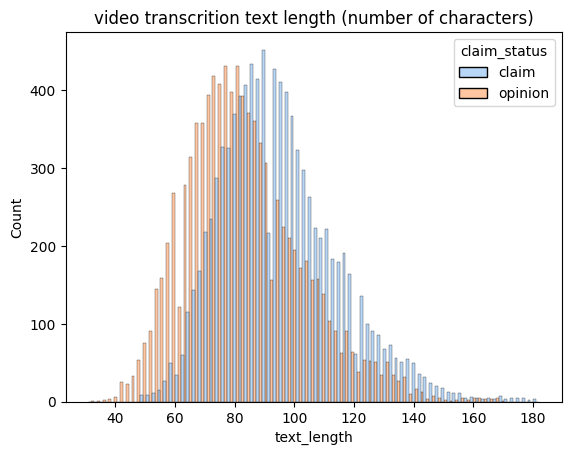

In [20]:
#visualize the distribution of video transcription text length for the claim status
plt.title('video transcrition text length (number of characters)')
sns.histplot(data = df, x = 'text_length', hue = 'claim_status', kde = False, multiple = 'dodge', stat = 'count', palette = 'pastel'
            , element = 'bars', legend = True)

Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters.

Feature selection and transformation

encode target and categorical variables

In [25]:
#make a copy of the data
x = df.copy()
#drop unnecessary value
x = x.drop(['#','video_id'], axis = 1)
#encode target variables
x['claim_status'] = x['claim_status'].replace({'opinion':0,'claim':1})
#dummy encode remaining categorical values
x = pd.get_dummies(x,columns=['verified_status','author_ban_status'], drop_first = True)
#first five rows
x.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


Split the data: 

*** target table : claim status ***

0 represents an opinion

1 represent a claim

In [26]:
#Identify target variables
y = x['claim_status']

In [27]:
#Identify features 
x = x.drop(['claim_status'], axis=1)
#First five rows
x.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [28]:
#get the shape of the dataframe
x.shape

(19084, 11)

Create train/validation/test sets:

split the data into training and test sets

In [30]:
#split into training and test
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Splitting the data into training and validation sets:

In [31]:
#split into training and validation
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=0.25, random_state=0)

In [32]:
#Get the shape of each
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

Extraction of numerical data from the text-based feature 'Video transcription text':

'Countvectorizer' will split the text into n-grams(bag of words)

we will break each video transcription text into both 2 grams and 3 grams then take the 15 most frequently reccuring token to use as features

In [33]:
# set up 'CountVectorizer' object
count_vec = CountVectorizer(ngram_range=(2,3),
                         max_features=15,
                         stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

Fit the vectorizer to the training data:

In [35]:
#extract the numerical from 'video_transcription_text' in the training data
count_data = count_vec.fit_transform(x_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
#place the numerical representation into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())
count_df

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11447,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#Concatenate 'x_train' and 'count_df' the final dataframe for the training dataset
x_train_final = pd.concat([x_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)
#first five rows
x_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Get n-grams counts the validation data:

In [40]:
#extract numerical data from 'video_transcrption_text' in the testing set
validation_count_data = count_vec.transform(x_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
#place the numerical data from validation into a dataframe 
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
#Concatenate 'x_val' and 'validation_count_df' to  form the final data_frame for training data
x_val_final = pd.concat([x_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df],axis=1)
x_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


Repeat the process for the test data:

In [43]:
#extract numerical features from 'video_transcription_text' in the testing set
test_count_data=count_vec.transform(x_test['video_transcription_text']).toarray()
#place the numerical representation into a dataframe
test_count_df=pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())
#concatenate 'x_test' and 'test_count_df' to form final dataframe for training data
x_test_final=pd.concat([x_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)
x_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


Build models:

(Random forest model):

In [48]:
#instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)
#create a dictionary for hyperparameters to tune
cv_params = {'max_depth':[5,7,None],
          'max_features':[0.3,0.6],
           'max_samples':[0.7],
           'min_samples_leaf':[1,2],
           'min_samples_split':[2,3],
           'n_estimators':[75,100,200],
          }
#define a dictionary of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']
#initiate the GridSearchCV Object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [49]:
%%time
rf_cv.fit(x_train_final, y_train)

CPU times: user 3min 16s, sys: 897 ms, total: 3min 17s
Wall time: 3min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [50]:
#examine the best recall score 
rf_cv.best_score_

0.9948228253467271

In [51]:
#examine best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

This model has an average recall score of 0.994 meaning the model correctly identifies 99.4% of the relevant instances in the dataset. it indicates a high level of accuracy in identifying true positives and a low rate of false positive

(XGBoost model):

In [61]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [63]:
%%time
xgb_cv.fit(x_train_final, y_train)

CPU times: user 2min 29s, sys: 42.1 s, total: 3min 11s
Wall time: 25.6 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [64]:
#examine the best recall score 
xgb_cv.best_score_

0.9898176171763818

In [65]:
#examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

This model also performs exceptionally well. Although its recall score is very slightly lower than the random forest model's, its precision score is perfect.

Evaluate the model:

In [53]:
#using the random forest best_estimator model to get predictions from the validation test
y_pred = rf_cv.best_estimator_.predict(x_val_final)

Display the predictions on the validation test:

In [54]:
#display the predictions on the validation set
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [55]:
#display the true labels of the validation set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model:

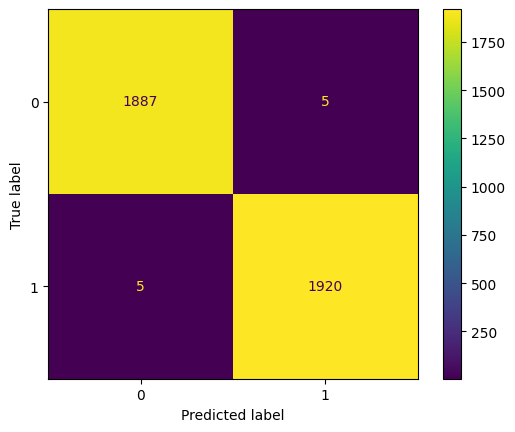

In [56]:
#compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)
#create display of confusion matrix 
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
#plot confusion matrix
log_disp.plot()
#display plot
plt.show()

Explanation for the confusion matrix:

the upper left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.

the upper right quadrant displays the number of false positives :the number of opinions that the model misclassified as claims.

the lower left quadrant displays the number of false negative: the number of claims that the model misclassified as opinions.

the lower rigth quadrant displays the number true positives :the number of claims that the model accurately classified as so

In [57]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val,y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The random forest model scores are nearly perfect, the confusion matrix indicates only 10 mislacssifications.

XGBoost:

Now, evaluate the XGBoost model on the validation set:

In [66]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(x_val_final)

In [67]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

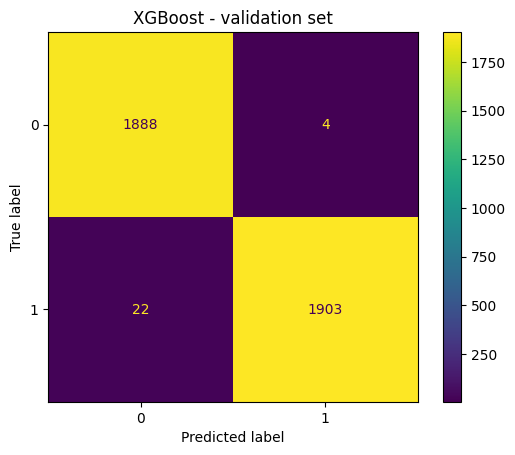

In [69]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

In [70]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.

Use champion model to predict on test data:

Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case random forest performed a little bit better, so it is the champion model.

In [71]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(x_test_final)

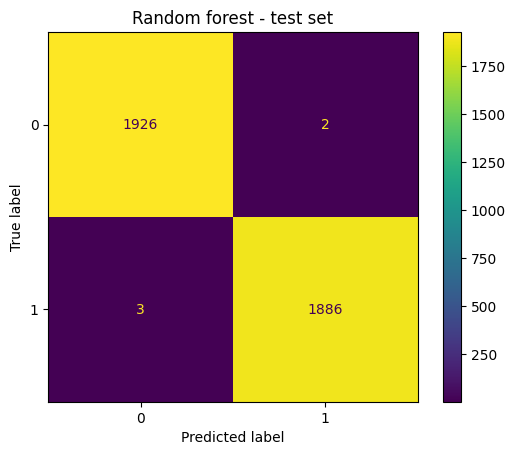

In [72]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

Feature importances of champion model:

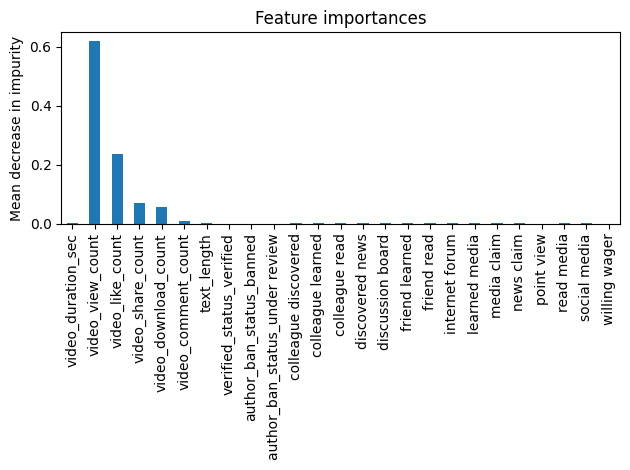

In [75]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

The most important features are: video_duration_sec, video_view_count,video_like_count,video_share_count.